# Machine Learning Part
**Importing Libraries**

In [1]:
# Data processing
import numpy as np 
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from scipy.stats import randint
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# Validation 
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve, classification_report
from sklearn.model_selection import cross_val_score

**Importing csv file for modelling**


In [2]:
# function to load the data and split into feature and target columns
def load_data(data_filepath):

#data_filepath: file path 


  data = pd.read_csv('C:\\Users\\ASUS\\Desktop\\Project Presentation\\Final Data Note\\Final Data\\Final_encoding.csv')

#feature_cols: features list
  feature_cols = ['Age', 'Gender', 'Family_History', 'Benefits', 'Medical_Insurence', 'anonymity', 'Medical_Leave', 'after_Interfere_in_work']

#X: labels for training
  X = data[feature_cols]
    
#Y: target label
  y = data['Treatment']

  return X, y, feature_cols

In [3]:
# Building a forest and checking features importance
def feature_importance(X, y, feature_cols):


  forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
  forest.fit(X, y)

  importance = forest.feature_importances_
  std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

  indices = np.argsort(importance)[::-1]

  labels = []
  for f in range(X.shape[1]):
      labels.append(feature_cols[f])      
     
        
# Plotting important features 
  plt.figure(figsize=(12,8))
  plt.title("Most Important Features")
  plt.bar(range(X.shape[1]), importance[indices],color="y", yerr=std[indices], align="center")

  plt.xticks(range(X.shape[1]), labels, rotation='vertical')
  plt.xlim([-1, X.shape[1]])

  plt.show();

-------------------------------------------------------------------------------
**Model 1 : Logistic Regression**

In [4]:
def logisticRegression(X_train, y_train, X_test, y_test, X, y):
    '''
          X_train: feature labels for training
          y_train: target label for training
          X_test: feature labels for test
          y_test: target label for test
          X: labels for training
          Y: target label
    '''
    
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)
    
    accuracy_score = evaluate_model(logreg, y_test, y_pred_class, X, y)
    
#Data for final graph
    methodDict['Log. Regres.'] = accuracy_score * 100

-------------------------------------------------------------------------------
**Model 2 : K-Nearest Neighbors Classifier**

In [5]:
def Knn(X_train, y_train, X_test, y_test, X, y):
    '''
          X_train: feature labels for training
          y_train: target label for training
          X_test: feature labels for test
          y_test: target label for test
          X: labels for training
          Y: target label

      '''

# Calculating the best parameters
    knn = KNeighborsClassifier(n_neighbors=5)
    
# Defining the parameter values that should be searched
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    
# Specifying "parameter distributions" rather than a "parameter grid"
    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist, X, y)
    
# Training KNeighborsClassifier model on the training set
    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)
    
# Making class predictions for the testing set
    y_pred_class = knn.predict(X_test)
    
    accuracy_score = evaluate_model(knn, y_test, y_pred_class, X, y)

#Data for final graph
    methodDict['KNN'] = accuracy_score * 100

-------------------------------------------------------------------------------
**Model 3 : Random Forest Classifier**

In [6]:
def randomForest(X_train, y_train, X_test, y_test, feature_cols, X, y):
    '''
          X_train: feature labels for training
          y_train: target label for training
          X_test: feature labels for test
          y_test: target label for test
          feature_cols: features_list
          X: labels for training
          Y: target label

      '''
      
# Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist, X, y)
    
# Building and fitting
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)
    
# Making class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)
    
    accuracy_score = evaluate_model(my_forest, y_test, y_pred_class, X, y)

#Data for final graph
    methodDict['R. Forest'] = accuracy_score * 100

-------------------------------------------------------------------------------
**Model 4 : Boosting**

In [7]:
def boosting(X_train, y_train, X_test, y_test,X, y):
    '''
          X_train: feature labels for training
          y_train: target label for training
          X_test: feature labels for test
          y_test: target label for test
          X: labels for training
          Y: target label

      '''
      
# Building and fitting 
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(base_estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)
    
# Making class predictions for the testing set
    y_pred_class = boost.predict(X_test)
  
    accuracy_score = evaluate_model(boost, y_test, y_pred_class, X, y)

#Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

---------------------------------------------------------------------------- 
**Model 5 : Bagging**

In [8]:
def bagging(X_train, y_train, X_test, y_test, X, y):
    '''
          X_train: feature labels for training
          y_train: target label for training
          X_test: feature labels for test
          y_test: target label for test
          X: labels for training
          Y: target label

      '''
      
# Building and fitting 
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)
    
# Making class predictions for the testing set
    y_pred_class = bag.predict(X_test)
 
    accuracy_score = evaluate_model(bag, y_test, y_pred_class, X, y)

#Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

-------------------------------------------------------------------------------
**Model Evaluation**

In [9]:
def evaluate_model(model, y_test, y_pred_class,X, y):
    '''
          model: model to be evaluated
          y_test: target label for test
          y_pred_class: classes predicted by that model
          X: labels for training
          Y: target label
    
          accuracy: accuracy of the evaluated model
      '''

# Confusion matrix
    confusion = metrics.confusion_matrix(y_test, y_pred_class)

# Saving values
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    
# Visualizing Confusion Matrix
    print('\n')
    sns.heatmap(confusion,annot=True,fmt="d") 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
# Classification Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('\033[1m'+'\nClassification Accuracy:', accuracy)

# AUC Score
    print('\033[1m'+'\nAUC Score:', metrics.roc_auc_score(y_test, y_pred_class))
     
# Cross-validated AUC
    print('\033[1m'+'Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean(), '\n')

    print('\033[1m'+'Classification Report:\n', classification_report(y_test, y_pred_class))

    return accuracy

Tuning the Model with Random Search CV

In [10]:
def tuningRandomizedSearchCV(model, param_dist, X, y):
    '''
          model: model for random search CV
          param_dist: dictionary of parameters and their values to be searched
          X: labels for training
          Y: target label

      '''

# n_iter controls the number of searches
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_
    
# Examining the best model
    print('\nRandomized Search Best Score: ', rand.best_score_)
    print('Randomized Search Best Parameters: ', rand.best_params_)
    
# Run RandomizedSearchCV 20 times (with n_iter=10) and Record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

Saving the Best Model and Predictions

In [11]:
# Saving best model results 
def save_model(X, y, X_test):
  '''
          X: labels for training
          Y: target label
          X_test: feature labels for test

      '''
# Generating predictions with the best method
  clf = AdaBoostClassifier()
  clf.fit(X, y)
  dfTestPredictions = clf.predict(X_test)

# Writing predictions to csv file
  results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})

# Saving to file
  results.to_csv('C:\\Users\\ASUS\\Desktop\\Project Presentation\\Final Data Note\\Final Data\\Final_encoding.csv', index=False)

In [12]:
 # Creating dictionaries for final graph
methodDict = {}
rmseDict = ()

Main Function of Modelling

In [13]:
def main():
  data_filepath = '/content/data_for_modelling.csv'
  print('Loading data...\n')  
  X, y, feature_cols = load_data(data_filepath)

  print('Plotting features in order of their importance..')
  feature_importance(X, y, feature_cols)


# Split X and y into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

    
# Model 1
  print('\033[94m'+'\033[1m'+'Building model 1: Logistic Regression...'+'\033[0m')
  logisticRegression(X_train, y_train, X_test, y_test, X, y)


# Model 2
  print('\n'+'\033[94m'+'\033[1m'+'Building model 2: k-Nearest Neighbors Classifier...'+'\033[0m')
  Knn(X_train, y_train, X_test, y_test, X, y)


# Model 3
  print('\n'+'\033[94m'+'\033[1m'+'Building model 3: Random Forests Classifier...'+'\033[0m')
  randomForest(X_train, y_train, X_test, y_test, feature_cols, X, y)


# Model 4
  print('\n'+'\033[94m'+'\033[1m'+'Building model 4: Boosting...'+'\033[0m')
  boosting(X_train, y_train, X_test, y_test, X, y)


# Model 5
  print('\n'+'\033[94m'+'\033[1m'+'Building model 5: Bagging...'+'\033[0m')
  bagging(X_train, y_train, X_test, y_test, X, y)


# Saving the best model results in a file
  print('Saving model...')
  save_model(X, y, X_test)

  print('Trained model saved!')

-------------------------------------------------------------------------------
**Function call and showing all Prediction Output of Models**

Loading data...

Plotting features in order of their importance..


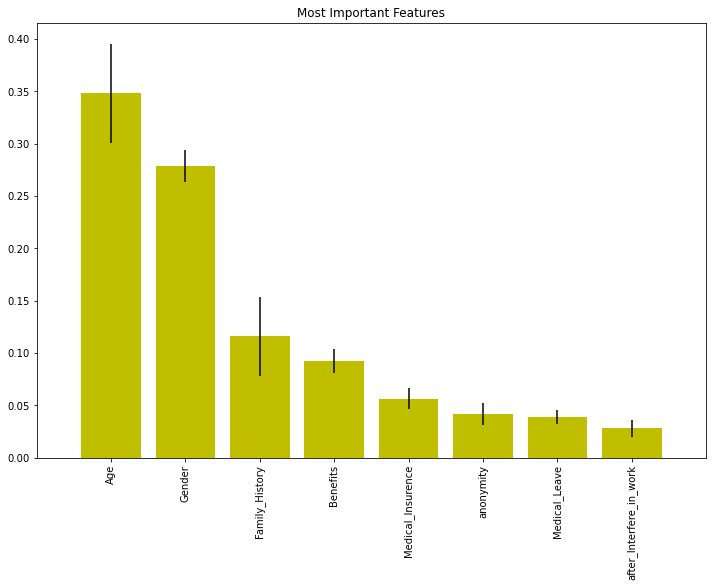

Building model 1: Logistic Regression...




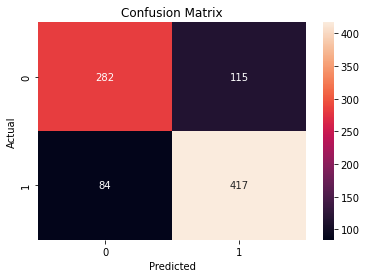


Classification Accuracy: 0.7783964365256125

AUC Score: 0.7713313926303564
Cross-validated AUC: 0.8068218319233138 

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       397
           1       0.78      0.83      0.81       501

    accuracy                           0.78       898
   macro avg       0.78      0.77      0.77       898
weighted avg       0.78      0.78      0.78       898


Building model 2: k-Nearest Neighbors Classifier...

Randomized Search Best Score:  0.8059169185491569
Randomized Search Best Parameters:  {'weights': 'uniform', 'n_neighbors': 27}
[0.808, 0.804, 0.804, 0.808, 0.806, 0.806, 0.806, 0.806, 0.808, 0.806, 0.808, 0.804, 0.794, 0.807, 0.805, 0.806, 0.808, 0.806, 0.801, 0.806]




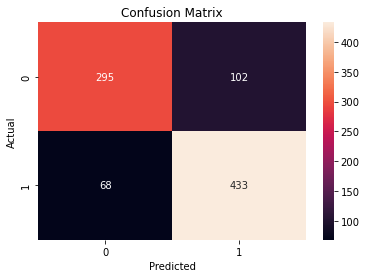


Classification Accuracy: 0.8106904231625836

AUC Score: 0.8036722524723852
Cross-validated AUC: 0.854527561660882 

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.78       397
           1       0.81      0.86      0.84       501

    accuracy                           0.81       898
   macro avg       0.81      0.80      0.81       898
weighted avg       0.81      0.81      0.81       898


Building model 3: Random Forests Classifier...

Randomized Search Best Score:  0.8141619272987592
Randomized Search Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}
[0.814, 0.814, 0.814, 0.817, 0.814, 0.814, 0.815, 0.814, 0.814, 0.814, 0.814, 0.814, 0.814, 0.815, 0.814, 0.814, 0.817, 0.814, 0.815, 0.814]




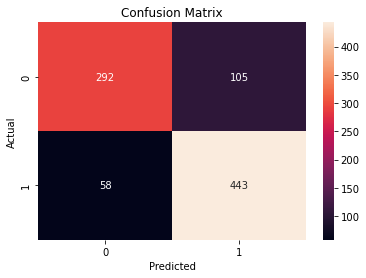


Classification Accuracy: 0.8184855233853007

AUC Score: 0.8098739548610587
Cross-validated AUC: 0.8752571528583901 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.74      0.78       397
           1       0.81      0.88      0.84       501

    accuracy                           0.82       898
   macro avg       0.82      0.81      0.81       898
weighted avg       0.82      0.82      0.82       898


Building model 4: Boosting...




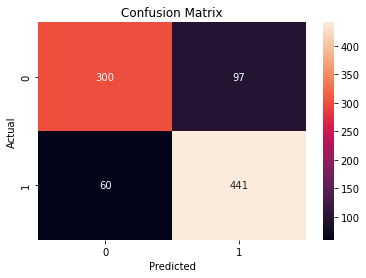


Classification Accuracy: 0.8251670378619154

AUC Score: 0.8179535136276566
Cross-validated AUC: 0.8806170629145882 

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       397
           1       0.82      0.88      0.85       501

    accuracy                           0.83       898
   macro avg       0.83      0.82      0.82       898
weighted avg       0.83      0.83      0.82       898


Building model 5: Bagging...




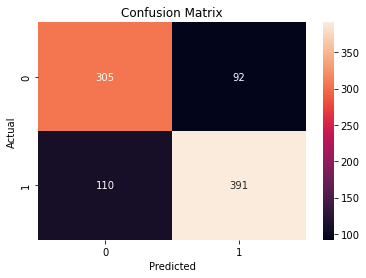


Classification Accuracy: 0.7750556792873051

AUC Score: 0.7743505432460016
Cross-validated AUC: 0.8198508320309807 

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75       397
           1       0.81      0.78      0.79       501

    accuracy                           0.78       898
   macro avg       0.77      0.77      0.77       898
weighted avg       0.78      0.78      0.78       898

Saving model...
Trained model saved!


In [14]:
main()

In [15]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    
    ax = s.plot(kind='bar', color=['grey', 'orange', 'lightgreen', 'yellow', 'cyan'], edgecolor='black') 
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Model')
    plt.ylabel('Accuracy Percentage')
    plt.title('Models Performance ')
  
    plt.show()

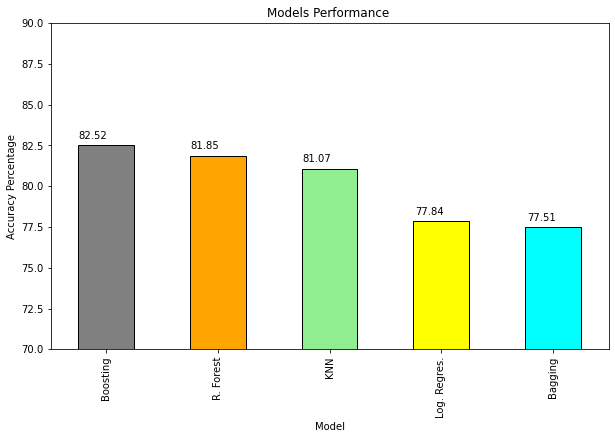

In [16]:
# plot of each model with their accuracy value
plotSuccess()